The following example has been taken from the web pages of Jason Brownlee. It uses the Iris set which exist in Scikit and introduces at the same time several statistical methods. This is  a real "hands-on".

Import Libraries

In [1]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#Provides train/test indices to split data in train/test sets. 
#Split dataset into k consecutive folds (without shuffling by default).
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)
#if you are reading from a file
#dataset=pandas.read_csv('iris.csv')

In [3]:
# shape
print(dataset.shape)
# head
print(dataset.head(5))
# descriptions.. all have the same scale in cms
print(dataset.describe())

(150, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [4]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


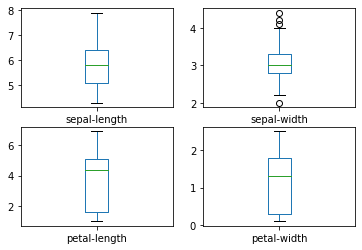

In [5]:
#Plots for each individual variable
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

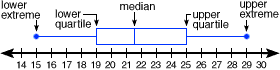

In [28]:
from IPython.display import Image
Image("Whiskerplot.gif")

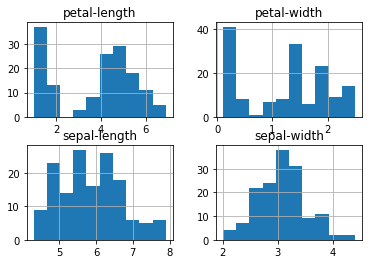

In [6]:
#histograms
dataset.hist()
plt.show()

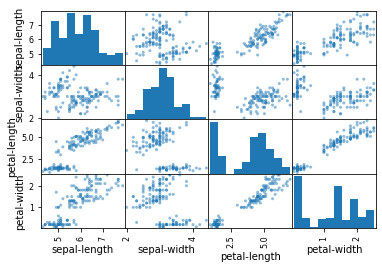

In [7]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

Now let us work with some algorithms. For that, we will create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

    Separate out a validation dataset.
    Set-up the test harness to use 10-fold cross validation.
    Build 5 different models to predict species from flower measurements
    Select the best model.


We need to know that the model we created is any good. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data. That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [8]:
#Split-out validation dataset
#Notice that we used a python slice to select the columns in the NumPy array. 
array = dataset.values
X = array[:,0:4]
Y = array[:,4]

validation_size = 0.20   # 30 data
seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [9]:
#We will use 10-fold cross validation to estimate accuracy.

#This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for 
#all combinations of train-test splits.

# Test options and evaluation metric

seed = 7

#We are using the metric of ‘accuracy‘ to evaluate models. 
#This is a ratio of the number of correctly predicted instances in divided by the total number of instances 
#in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). 
#We will be using the scoring variable when we run build and evaluate each model next.

scoring = 'accuracy'

Let’s evaluate 6 different algorithms:

    Logistic Regression (LR)
    Linear Discriminant Analysis (LDA)
    K-Nearest Neighbors (KNN).
    Classification and Regression Trees (CART).
    Gaussian Naive Bayes (NB).
    Support Vector Machines (SVM).


Before we perform the implementation, let me explain the statistical method we will use to evaluate the data. We will use the so call **k-fold Cross validation**.

Usually, we split the data set into training and testing sets and use the training set to train the model and testing set to test the model. We then evaluate the model performance based on an error metric to determine the accuracy of the model. This method however, is not very reliable as the accuracy obtained for one test set can be very different to the accuracy obtained for a different test set. K-fold Cross Validation(CV) provides a solution to this problem by dividing the data into folds and ensuring that each fold is used as a testing set at some point. 

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 becoming 5-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

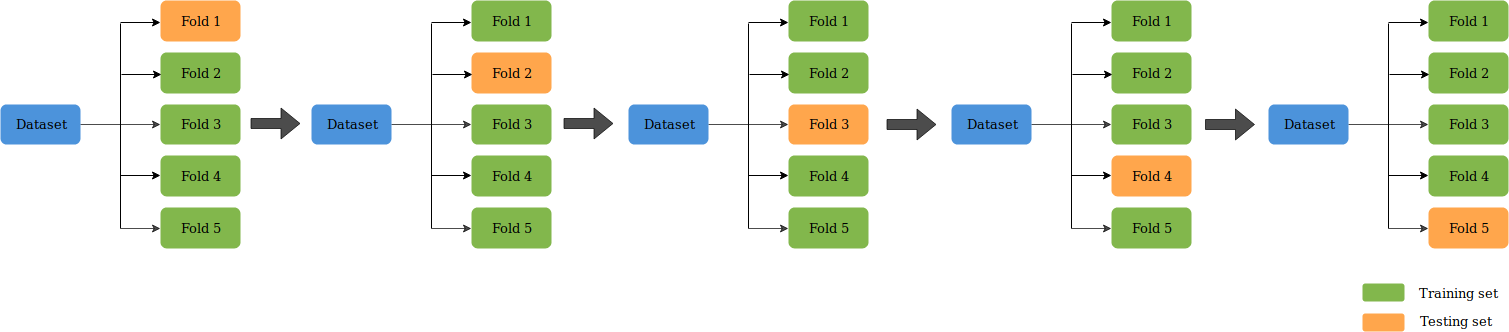

In [30]:
Image("Crossvalidation.png")

In [27]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    #Cross-validation is a statistical method used to estimate the skill of machine learning models.
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


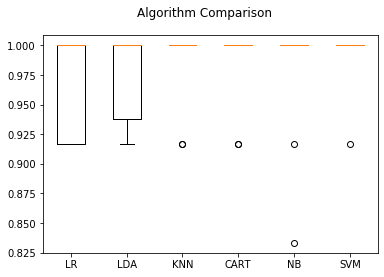

In [11]:
# Compare Algorithms
#You can see that the box and whisker plots are squashed at the top of the range, 
#with many samples achieving 100% accuracy.
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The KNN algorithm is very simple and was an accurate model based on our tests. Now we want to get an idea of the accuracy of the model on our validation set. We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica']
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor']
Accuracy Score =  0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



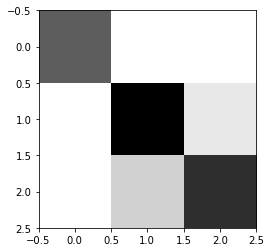

In [23]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

predictions = knn.predict(X_validation)

print(Y_validation[:5])
print(predictions[:5])

print('Accuracy Score = ',accuracy_score(Y_validation, predictions))

# On y-axis confusion matrix has the actual values, and on the x-axis the values given by the predictor. 
# Therefore, the counts on the diagonal are the number of correct predictions. 
# And elements of the diagonal are incorrect predictions. 

print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

import matplotlib.pyplot as plt
conf = confusion_matrix(Y_validation, predictions)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()
